In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları görmezden gelme!
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("magaza_yorumlari_duygu_analizi.csv", encoding = "utf-16")

In [3]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [4]:
eksik_veri_sayisi=data.isnull().sum()

In [5]:
eksik_veri_sayisi

Görüş    3
Durum    0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,Tarafsız
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,Tarafsız
11426,bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...,Olumsuz
11427,Bir sene olmadı ayar düğmesine basıyorum ekran...,Tarafsız


In [8]:
data.columns

Index(['Görüş', 'Durum'], dtype='object')

In [9]:
data["Durum"].value_counts()

Durum
Olumlu      4252
Olumsuz     4237
Tarafsız    2937
Name: count, dtype: int64

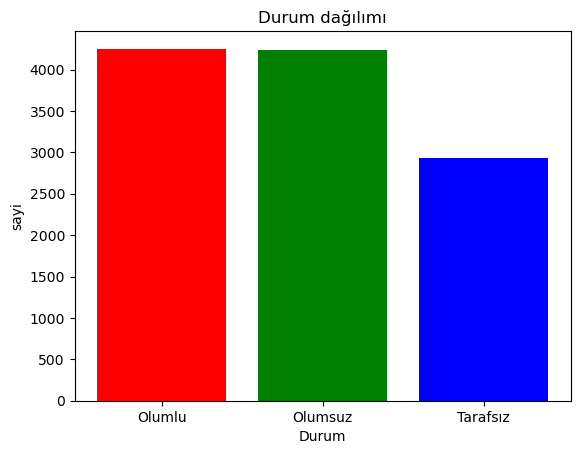

In [10]:
import matplotlib.pyplot as plt
durum_sayilari=data["Durum"].value_counts()
plt.bar(durum_sayilari.index,durum_sayilari.values,color=["red","green","blue"])
plt.xlabel("Durum")
plt.ylabel("sayi")
plt.title("Durum dağılımı")
plt.show()

In [11]:
data["Durum"]=data.loc[:,"Durum"].map({"Olumlu":0,"Olumsuz":1,"Tarafsız":2})

In [12]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1


In [13]:
data["Görüş"]

0        ses kalitesi ve ergonomisi rezalet, sony olduğ...
1                               hizli teslimat tesekkürler
2        ses olayı süper....gece çalıştır sıkıntı yok.....
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        Kulaklığın sesi kaliteli falan değil. Aleti öv...
                               ...                        
11424          biraz fazla ısınıyor ama sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...
11427    Bir sene olmadı ayar düğmesine basıyorum ekran...
11428    Urun kaliteli zamaninda tedlimat ve kullanisli...
Name: Görüş, Length: 11426, dtype: object

In [14]:
print(data["Görüş"][0]+"\n")
print(data["Görüş"][4000]+"\n")
print(data["Görüş"][4586]+"\n")

ses kalitesi ve ergonomisi rezalet, sony olduğu için aldım ama 4'de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi, kesinlikle tavsiye etmiyorum.

Süpürge arayışınızı bitirmek ve bu konuyu kapatmak için tercihiniz olmalı. Anlatılmaz yaşanır bir temizlik gücü var. Parça ve aksamlar için şimdiden bir şey söylemek zor...Ancak anneme aldık, temizliğini görünce kendi süpürgemden soğudum :) Bundan sonraki süpürge tercihim olacak..

Yerli markaların satış sonrası hizmetinden yaka silktim. Ürün güzel ama
kurulum için altı gündür bekliyorum. Vestel hariç yerli hiçbir ürün
satın almamaya karar verdim. Üstüne biraz koyun, Bosch veya Vestel alın,
anında kurulumu oluyor.



In [15]:
data["Görüş"][125]

'ürün az önce elime geçti buradan aldım kargoyu zamanında yolladıkları için teşekkür ediyorum ama ürün hayal kırıklığı çok pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun 1200w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum ama yinede tavsiye etmiyorum'

In [16]:
import re 
cumle0=data["Görüş"][125]
cumle1=re.sub("[^a-zA-Z]"," ",cumle0)
cumle2=cumle1.lower()

In [17]:
cumle2

' r n az  nce elime ge ti buradan ald m kargoyu zaman nda yollad klar  i in te ekk r ediyorum ama  r n hayal k r kl     ok pi man oldum malzeme kalitesi bana g re iyi de il  eki  g c  s p rd   n  bile farketmiyorum diyece im kadar kom umun     w s p rgesi bundan g zel  ekti ini s yleyebilirim yorumlara bakarak  r n m n ar zal  oldugunu bile d   n yorum ama yinede tavsiye etmiyorum'

In [18]:
donusum_haritasi=str.maketrans("üÜöÖİçÇğĞşŞı","uUoOIcCgGsSi")
cumle="örnek cümle içerik"
str1=cumle0.translate(donusum_haritasi)
print(str1)

urun az once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum ama urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun 1200w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum ama yinede tavsiye etmiyorum


In [19]:
cumle1 = re.sub("[^a-zA-Z]", " ", str1)
cumle2 = cumle1.lower()
cumle2

'urun az once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum ama urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun     w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum ama yinede tavsiye etmiyorum'

In [20]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaaaaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaaaaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import nltk
from nltk.corpus import stopwords

cumle2=nltk.word_tokenize(cumle2)
cumle2=[word for word in cumle2 if not word in set(stopwords.words("turkish"))]

In [23]:
cumle2

['urun',
 'once',
 'elime',
 'gecti',
 'buradan',
 'aldim',
 'kargoyu',
 'zamaninda',
 'yolladiklari',
 'icin',
 'tesekkur',
 'ediyorum',
 'urun',
 'hayal',
 'kirikligi',
 'cok',
 'pisman',
 'oldum',
 'malzeme',
 'kalitesi',
 'bana',
 'gore',
 'iyi',
 'degil',
 'cekis',
 'gucu',
 'supurdugunu',
 'bile',
 'farketmiyorum',
 'diyecegim',
 'kadar',
 'komsumun',
 'w',
 'supurgesi',
 'bundan',
 'guzel',
 'cektigini',
 'soyleyebilirim',
 'yorumlara',
 'bakarak',
 'urunumun',
 'arizali',
 'oldugunu',
 'bile',
 'dusunuyorum',
 'yinede',
 'tavsiye',
 'etmiyorum']

In [24]:
cumle3=" ".join(cumle2)
cumle3

'urun once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum yinede tavsiye etmiyorum'

In [25]:
def harfdegistir(cumle):
    # Türkçe karakterleri İngilizce karakterlere dönüştürme
    translation_table = str.maketrans("üÜöÖİçÇğĞşŞı", "uUoOIcCgGsSi")
    cumle = cumle.translate(translation_table)
    
    # Sadece harfleri bırak, diğer karakterleri boşlukla değiştir
    cumle = re.sub("[^a-zA-Z]", " ", cumle)
    
    # Tüm harfleri küçült
    cumle = cumle.lower()
    
    # Kelimelere böl
    cumle = nltk.word_tokenize(cumle)
    
    # Stopwords kelimelerini çıkar
    stop_words = set(stopwords.words("turkish"))
    cumle = [word for word in cumle if word not in stop_words]
    
    # Kelimeleri birleştir
    cumle = " ".join(cumle)
    
    return cumle

In [26]:
data["Görüş"]

0        ses kalitesi ve ergonomisi rezalet, sony olduğ...
1                               hizli teslimat tesekkürler
2        ses olayı süper....gece çalıştır sıkıntı yok.....
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        Kulaklığın sesi kaliteli falan değil. Aleti öv...
                               ...                        
11424          biraz fazla ısınıyor ama sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...
11427    Bir sene olmadı ayar düğmesine basıyorum ekran...
11428    Urun kaliteli zamaninda tedlimat ve kullanisli...
Name: Görüş, Length: 11426, dtype: object

In [27]:
print("Veri setinin uzunluğu: ",len(data["Görüş"]))

Veri setinin uzunluğu:  11426


In [28]:
X = data["Görüş"].values
print("Veri Setinin Uzunluğu: ",len(X))

Veri Setinin Uzunluğu:  11426


In [30]:
X[125]

'ürün az önce elime geçti buradan aldım kargoyu zamanında yolladıkları için teşekkür ediyorum ama ürün hayal kırıklığı çok pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun 1200w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum ama yinede tavsiye etmiyorum'

In [31]:
SonGorus = []

for i in range(len(X)):
    X_ = harfdegistir(X[i])
    SonGorus.append(X_)

In [33]:
SonGorus[125]

'urun once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum yinede tavsiye etmiyorum'

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
max_feature = 2500

cv = CountVectorizer(max_features = max_feature, stop_words = stopwords.words("turkish"))

space_matrix = cv.fit_transform(SonGorus).toarray() # x

print("En sık kullanılan {} kelimeler {}".format(max_feature, cv.get_feature_names_out()))

En sık kullanılan 2500 kelimeler ['ac' 'acayip' 'acidan' ... 'zor' 'zorunda' 'zorundasiniz']


In [35]:
max_feature

2500

In [36]:
X = space_matrix
y = data.iloc[:,1].values

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# RandomForestClassifier modelini oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # n_estimators, ormanınızdaki ağaç sayısıdır

# Modeli eğitim verileriyle eğit
rf_model.fit(x_train, y_train)

# Test verileri üzerinde tahminler yap
y_pred = rf_model.predict(x_test)

# Performans metriklerini değerlendir
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
print("Doğruluk Skoru: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76      1059
           1       0.72      0.76      0.74      1054
           2       0.55      0.29      0.38       744

    accuracy                           0.68      2857
   macro avg       0.65      0.64      0.63      2857
weighted avg       0.66      0.68      0.65      2857

Karışıklık Matrisi:
 [[919  70  70]
 [147 797 110]
 [285 240 219]]
Doğruluk Skoru: 67.73%


In [41]:
def giris_cumlesi_sınıflandır(cumle):
    # Girilen cümleyi ön işlemden geçir
    temiz_cumle = harfdegistir(cumle)
    
    # CountVectorizer kullanarak cümleyi öznitelik vektörüne dönüştür
    vektor = cv.transform([temiz_cumle]).toarray()  # cv, daha önce fit edilmiş CountVectorizer nesnesidir
    
    # Model ile tahmin yap
    tahmin = rf_model.predict(vektor)
    
    # Tahmini yazdır
    if tahmin == 0:
        print("Cümlenin sınıfı: Olumlu")
    elif tahmin == 1:
        print("Cümlenin sınıfı: Olumsuz")
    else:
        print("Cümlenin sınıfı: Tarafsız")

# Örnek bir cümle ile test et
ornek_cumle = "Eğer daha önce hiç otele tatile gitmemişseniz size iyi gelir. 5 aylık bebeğimde bugün otele giriş yaptık ben hayatımda böyle rezalet görmedim. Otele girişimizde odaların temizlendiğini beklememiz gerektiğini söylediler ancak kalabalıktan beklenebilecek bir alan yoktu. Odaya çıktığımızda resmen çarşaflarda kum vardı eskilikten pislikten yüzüne bile bakılmaz. Yemeklere gelince ise yine aynı rezalet. Ailemle aç kaldık. Yiyecek bir şey bulamadığımdan sütüm bile gelmedi. Üstelik uygun bir fiyata da almadım. Paramla rezil oldum. Yemekhanede çatal kaşık dahi bulamadık. Yani nereden tutsan elinde kalır iğrenç."
giris_cumlesi_sınıflandır(ornek_cumle)


Cümlenin sınıfı: Olumsuz


In [42]:
def giris_cumlesi_sınıflandır(cumle):
    # Girilen cümleyi ön işlemden geçir
    temiz_cumle = harfdegistir(cumle)
    
    # CountVectorizer kullanarak cümleyi öznitelik vektörüne dönüştür
    vektor = cv.transform([temiz_cumle]).toarray()  # cv, daha önce fit edilmiş CountVectorizer nesnesidir
    
    # Model ile tahmin yap
    tahmin = rf_model.predict(vektor)
    
    # Tahmini yazdır
    if tahmin == 0:
        print("Cümlenin sınıfı: Olumlu")
    elif tahmin == 1:
        print("Cümlenin sınıfı: Olumsuz")
    else:
        print("Cümlenin sınıfı: Tarafsız")

# Örnek bir cümle ile test et
ornek_cumle = "çok beğendim herkese öneririm"
giris_cumlesi_sınıflandır(ornek_cumle)

Cümlenin sınıfı: Olumlu
